In [1]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0,1";
import random
random.seed(10)
import pandas as pd
data=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification.csv')
#test=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification-test.csv')

data.head(10)

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
0,0,https://api.github.com/repos/eamodio/vscode-gi...,bug,2021-01-02T18:07:30Z,NONE,https://api.github.com/repos/eamodio/vscode-gi...,Welcome screen on every editor window is very ...,I just discovered Gitlens and find the functio...
1,1,https://api.github.com/repos/binwiederhier/pco...,bug,2020-12-31T18:19:31Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"""pcopy invite"" and ""pcopy paste abc:"" does not...",NaN
2,2,https://api.github.com/repos/binwiederhier/pco...,bug,2021-01-03T04:33:36Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"UI: Modal overlay is half transparent, shouldn...",NaN
3,3,https://api.github.com/repos/Sothatsit/RoyalUr...,enhancement,2020-12-25T00:46:00Z,OWNER,https://api.github.com/repos/Sothatsit/RoyalUr...,Make the loading screen scale with browser win...,Currently the loading wheel is a fixed size in...
4,4,https://api.github.com/repos/Malivil/TTT-Custo...,bug,2021-01-02T21:36:57Z,OWNER,https://api.github.com/repos/Malivil/TTT-Custo...,Spectator - Investigate a way to strip weapons...,To bring magneto stick floating
5,5,https://api.github.com/repos/jankuss/shroom/is...,enhancement,2020-12-31T13:43:33Z,NONE,https://api.github.com/repos/jankuss/shroom,Single Shroom instance for multiple canvases?,Is it possible to be able to create a single S...
6,7,https://api.github.com/repos/juniorGreg/moisi_...,bug,2020-12-27T01:40:34Z,OWNER,https://api.github.com/repos/juniorGreg/moisi_...,Correct navigation bar for some resolution,![Capture d’écran_2020-12-26_20-40-02](https:/...
7,8,https://api.github.com/repos/JoeParrinello/Bro...,enhancement,2021-01-02T16:05:43Z,OWNER,https://api.github.com/repos/JoeParrinello/Bro...,Return asset growth,Would have to cache:\r\n- Stock Ticker Request...
8,9,https://api.github.com/repos/Forty-Bot/trends....,enhancement,2021-01-03T03:46:34Z,OWNER,https://api.github.com/repos/Forty-Bot/trends.tf,Add filter for logs,Add the ability to filter logs like on other p...
9,10,https://api.github.com/repos/andrewjj20/post/i...,enhancement,2020-10-23T04:38:35Z,COLLABORATOR,https://api.github.com/repos/andrewjj20/post,Create trait for Meetup Service publisher stores,Developers could want different backing publis...


> Print the length of the dataset

In [2]:
data=data.sample(frac=0.25)
len(data)

180725

In [3]:
data=data[['issue_body', 'issue_label']]

In [4]:
data.head()

,issue_body,issue_label
207617,"Currently, negative numbers are not being toke...",bug
569499,<!--\r\nBefore you submit an issue we recommen...,bug
116449,"As of v1.2.0-1.2.2, the newly created project ...",bug
162763,Some references to the editing domain and to t...,enhancement
707572,When executing the localBuildRun scripts twice...,bug


> Drop nulls

In [5]:
data = data.dropna(subset=['issue_body'])

In [6]:
len(data)

162607

> Standardize the text

In [7]:
import re

def standardize_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\s+' ,'',text)
    text = text.lower()
    return text.strip()

data['issue_body'] = data['issue_body'].apply(standardize_text)

data = data.drop_duplicates(subset=['issue_body'])

In [8]:
len(data)

156233

> Remove punctuation

In [9]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data['issue_body'] = data['issue_body'].apply(remove_punctuation)

In [10]:
possible_labels = data.issue_label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'bug': 0, 'enhancement': 1, 'question': 2}

In [11]:
data['issue_label'] = data.issue_label.replace(label_dict)

/tmp/ipykernel_24/3275910327.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['issue_label'] = data.issue_label.replace(label_dict)


In [12]:
data.head(10)

,issue_body,issue_label
207617,currently negative numbers are not being token...,0
569499,before you submit an issue we recommend you vi...,0
116449,as of v120122 the newly created project from t...,0
162763,some references to the editing domain and to t...,1
707572,when executing the localbuildrun scripts twice...,0
65867,summary i would love to be able to invoke argo...,1
480970,wellknownchangepasswordclose1070bysapphiredpul...,0
687968,summary strategy contains call to displaydepre...,0
557940,long tap animation is not displaying,0
647737,aht20 is a temperature humidity sensor with a ...,1


In [13]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# def clean_tokenization(text):
#   return word_tokenize(text)

# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words=set(stopwords.words('english'))
# def clean_stopwords(token):
#    return [item for item in token if item not in stop_words]

# data['issue_body'] = data['issue_body'].apply(clean_tokenization)
# data['issue_body']=data['issue_body'].apply(clean_stopwords)


In [14]:
# import nltk
# nltk.download('punkt')

In [15]:
# import re
# import nltk
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

In [16]:
# def convert_to_string(listReview):
#   return' '.join(listReview)
# data['issue_body']=data['issue_body'].apply(convert_to_string)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

min_samples = data['issue_label'].value_counts().min()

# Resample each class to have the same number of samples (minimum number)
rus = RandomUnderSampler(sampling_strategy={class_label: min_samples for class_label in data['issue_label'].unique()})
X, y = rus.fit_resample(data.drop(columns='issue_label'), data['issue_label'])

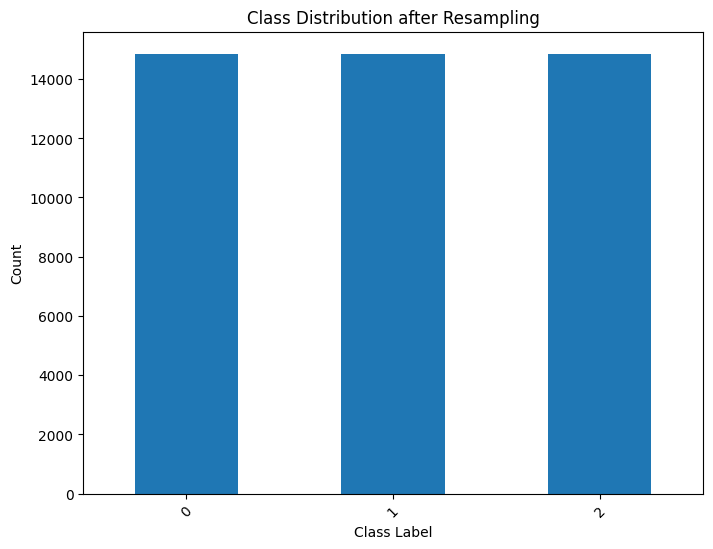

In [18]:
import matplotlib.pyplot as plt

# Get value counts of the resampled labels
label_counts = pd.Series(y).value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Class Distribution after Resampling')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
len(X), len(y)

(44580, 44580)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(x_train), len(x_test)

(35664, 8916)

In [21]:
# for plotting comparisons
acc = []; pre = [] ; rec = [] ; f = []

In [22]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics

In [23]:
# Install ktrain
!pip install --upgrade pip -q
!pip install -q ktrain
!pip install tf-keras==2.15
import os 
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import ktrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [24]:
from ktrain import text

In [25]:
x_train

,issue_body
396342,referring to this issue 325httpsgithubcomreact...
718143,rendere letichetta sullarco instanceof aderent...
545911,input cs private static void memsetnint source...
229341,describe the bug when executing the program ou...
447840,describe the bug i have windows 10 system and ...
...,...
281229,await clientforwardmessages tonumbercus true86...
528836,thus writing number will fail even if number i...
501150,hi it is question but not issue i did not find...
142956,bug report relevant components infoicon curren...


In [26]:
class_names=['enhancement', 'bug','question']

In [27]:
x_train = x_train['issue_body'].tolist()
y_train = y_train.to_numpy()
x_test = x_test['issue_body'].tolist()
y_test = y_test.to_numpy()


In [28]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train,
                                                                      y_train=y_train,
                                                                      x_test=x_test,
                                                                      y_test=y_test,
                                                                      class_names=class_names,
                                                                      preprocess_mode='bert',maxlen=80)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [29]:
# Step 3: Load the pre-trained BERT model
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)

# Step 4: Initialize a ktrain classifier using BERT
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

# Step 5: Train the classifier on your data
learner.fit_onecycle(2e-5, 1)

# Step 6: Evaluate the classifier on a validation set
learner.validate(val_data=(x_test, y_test))


Is Multi-Label? False
maxlen is 80


/opt/conda/lib/python3.10/site-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


begin training using onecycle policy with max lr of 2e-05...
279/279 [==============================] - 60s 181ms/step
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3022
           1       0.73      0.76      0.75      2919
           2       0.71      0.70      0.70      2975

    accuracy                           0.72      8916
   macro avg       0.72      0.72      0.72      8916
weighted avg       0.72      0.72      0.72      8916



array([[2079,  430,  513],
       [ 341, 2229,  349],
       [ 503,  384, 2088]])

simulating training for different learning rates... this may take a few moments...


/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
1115/1115 [==============================] - 600s 538ms/step - loss: 0.6927 - accuracy: 0.7051
Epoch 2/2
1115/1115 [==============================] - 289s 259ms/step - loss: 2.9044 - accuracy: 0.3307


/opt/conda/lib/python3.10/site-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))
/opt/conda/lib/python3.10/site-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss


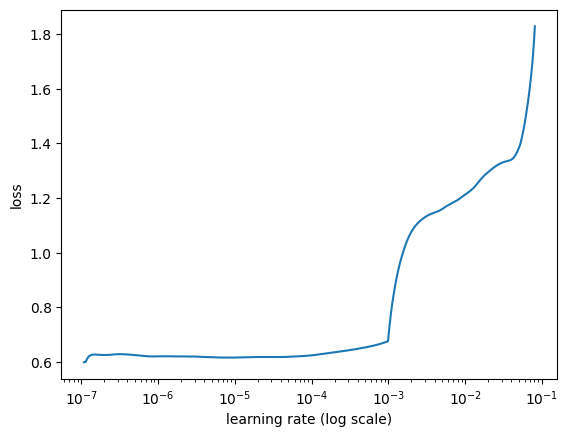

In [30]:
# It may need long time but ensures healthy training
learner.lr_find(show_plot=True, max_epochs=2)

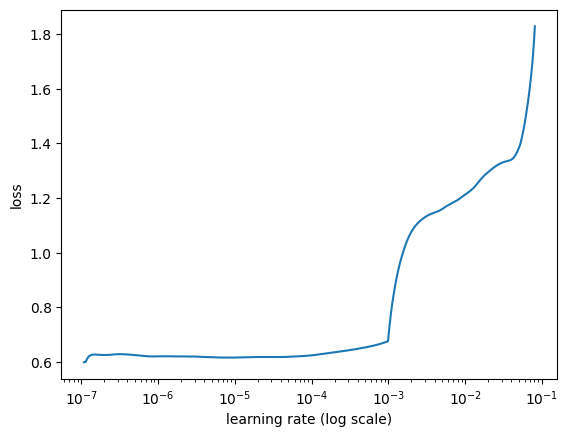

In [31]:
# After the learning rate find process plot the curve of leaning rate - loss to select best learning rate
learner.lr_plot()

In [32]:
# Fit the leraner to the data for 2 epochs
# Many other fit options available on the documentation of ktrain https://github.com/amaiya/ktrain
learner.autofit(2e-5, 2)
learner.validate(val_data=(x_test, y_test))



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/2
1115/1115 [==============================] - 679s 592ms/step - loss: 0.6236 - accuracy: 0.7453 - val_loss: 0.6773 - val_accuracy: 0.7253
Epoch 2/2
279/279 [==============================] - 59s 181ms/step
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      3022
           1       0.73      0.76      0.74      2919
           2       0.71      0.70      0.71      2975

    accuracy                           0.72      8916
   macro avg       0.72      0.72      0.72      8916
weighted avg       0.72      0.72      0.72      8916



array([[2108,  410,  504],
       [ 370, 2213,  336],
       [ 479,  412, 2084]])

In [33]:
#predictor = ktrain.get_predictor(learner.model)
#predictor.save('/content/drive/MyDrive/NLP/my_predictor')